## rutas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hv_path = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/data/datos_con_sector.csv'
dv_path = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/data/datos_con_sector.csv'

## liberías

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## carga del dataset con sectores

In [7]:
path = hv_path
#path = dv_path

In [8]:
df = pd.read_csv(path)

In [9]:
df.drop(columns=['Unnamed: 0'], inplace =True)

In [10]:
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,Nombre_sector
0,iUkBsXP6XTav/ZnDJHEd3A==,Propiedad,2020-12-18,2021-02-17,2020-12-18,-2.033523,-79.893292,Ecuador,Guayas,Guayaquil,...,NaN,NaN,145000.0,USD,NaN,Sector (Norte Guayaquil - Villa Club) - Propi...,TRAVI BIENES RAICES - REALTOR.\nPROPIEDAD (CAS...,Casa,Venta,Villa Club
1,Il0K8hDYRkTRIzV0mo5jgQ==,Propiedad,2020-12-18,2020-12-18,2020-12-18,-2.055185,-79.930277,Ecuador,Guayas,Guayaquil,...,NaN,NaN,125000.0,USD,NaN,Almería ubicada en (URB LA RIOJA) venta de casa.,Travi Bienes Raíces – Elite pone en disposició...,Casa,Venta,La Rioja
2,N9GeHO202POeU5iK7gvxAA==,Propiedad,2020-12-18,2021-01-08,2020-12-18,-2.023776,-79.917871,Ecuador,Guayas,Guayaquil,...,NaN,NaN,380.0,USD,NaN,"Alquiler de casa en Villa del Rey, primeras Et...",Casa de dos plantas parcialmente amoblada con...,Casa,Alquiler,Villas del Rey
3,0RxX2VngJ4h6uM8zRMgnjw==,Propiedad,2020-12-18,2021-01-05,2020-12-18,-2.059427,-79.928693,Ecuador,Guayas,Guayaquil,...,NaN,NaN,96500.0,USD,NaN,Al inicio de la vía a La Aurora en villa Itali...,Travi Bienes Raíces - Élite pone a su disposic...,Casa,Venta,Villa Italia
4,japZaqdp3BZUCMEZRv2/kw==,Propiedad,2020-12-18,2021-02-17,2020-12-18,-2.055185,-79.930277,Ecuador,Guayas,Guayaquil,...,NaN,NaN,125000.0,USD,NaN,PROPIEDAD-VENDO-Urbn. RIOJA A LA ALTURA DE LA ...,FRANQUICIA-Elite pone en disposición de Venta ...,Casa,Venta,La Rioja


In [11]:
FILAS_P2 = df.shape[0]
FILAS_P2

100895

## limpieza

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100895 entries, 0 to 100894
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100895 non-null  object 
 1   ad_type          100895 non-null  object 
 2   start_date       100895 non-null  object 
 3   end_date         100895 non-null  object 
 4   created_on       100895 non-null  object 
 5   lat              100895 non-null  float64
 6   lon              100895 non-null  float64
 7   l1               100895 non-null  object 
 8   l2               100895 non-null  object 
 9   l3               98681 non-null   object 
 10  l4               91446 non-null   object 
 11  l5               43648 non-null   object 
 12  l6               8045 non-null    object 
 13  rooms            3175 non-null    float64
 14  bedrooms         23307 non-null   float64
 15  bathrooms        88420 non-null   float64
 16  surface_total    352 non-null     floa

### únicamente se trabajará con registros de Quito y Guayaquil

In [ ]:
df = df.loc[(df['l3'] == 'Guayaquil') | (df['l3'] == 'Quito')]

In [ ]:
FILAS_P3 = df.shape[0]
print(f'se convervan {FILAS_P3} registros')

se convervan 97065 registros


### se descartan las columnas que no son relevantes para el análisis

In [ ]:
#contenido de la colummna "currency"
df['currency'].unique()

array(['USD', nan], dtype=object)

In [ ]:
#contenido de la colummna "l4"
df['l4'].unique()

array([nan, 'Samborondon', 'Centro Norte', 'Sur De Quito',
       'Norte De Quito', 'Via A La Costa', 'Centro Colonial',
       'Sur De Guayaquil', 'Norte De Guayaquil', 'Centro De Guayaquil',
       'Valle Los Chillos', 'Malecon 2000', '12 de octubre'], dtype=object)

In [ ]:
#contenido de la colummna "l5"
df['l5'].unique()

array([nan, 'San Isidro del Inca', 'Mariscal Sucre', 'Cochapamba',
       'Jipijapa', 'Kennedy', 'Iñaquito', 'Comité del Pueblo',
       'Rumipamba', 'Belisario Quevedo', 'La Ferroviaria', 'La Mena',
       'La Ecuatoriana', 'La Argelia', 'Carcelen', 'El Condado',
       'Cotocollao', 'Ponceano', 'Itchimbía', 'San Juan',
       'Centro De Quito', 'Concepción', 'Turubamba', 'Solanda',
       'Chillogallo', 'Alborada', 'Urdesa central', 'Guamaní', 'Quitumbe',
       'Vía a Daule', 'La Magdalena', 'Chimbacalle', 'Kennedy Norte',
       'Garzota', 'San Bartolo', 'Francisco de Orellana', 'Chilibulo',
       'Samanes', 'San Martín', 'Conocoto', 'Bellavista',
       'Terminal Terrestre', 'Sangolqui', 'Ciudad Celeste', 'Sauces',
       'Samborondon', 'Ceibos', 'Centro Sur', 'Vía Salitre',
       'Puerto Santa Ana', 'Miraflores', 'Calderón', 'Amagasi Del Inca',
       'Isla Mocolí', 'La Merced', 'Vía La Aurora', 'Las Cumbres',
       'Santa Cecilia', 'Caupicho', 'Quito Tenis', 'Inmaconsa'],
   

In [ ]:
#contenido de la colummna "l6"
df['l6'].unique()

array([nan, 'El Batan', 'Gonzalez Suarez', 'El Inca', 'Las Casas',
       'La Carolina', 'La Luz', 'La Floresta', 'Álamos Norte',
       'Santa Prisca', 'San Carlos', 'Monteserrin', 'El Pinar',
       'Bellavista', 'Bellavista de Carretas', 'Santa Lucía', 'El Recreo',
       'Colinas del Pichincha', 'Villaflora'], dtype=object)

In [ ]:
#las columnas "created_on" y "start_date" tienen la misma información por lo que se puede eliminar una de ellas
idx = df['created_on'] != df['start_date']
idx.sum()

0

In [ ]:
#contenido de la colummna "price_period"
df['price_period'].unique()

array([nan, 'Mensual'], dtype=object)

In [ ]:
#"title" y "description" también se pueden descartar

df.drop(columns=['title', 'description', 'ad_type', 'price_period', 'created_on', 'currency', 'l4', 'l5', 'l6'], inplace=True)

In [ ]:
df.isna().sum()

id                     0
start_date             0
end_date               0
lat                    0
lon                    0
l1                     0
l2                     0
l3                     0
rooms              95299
bedrooms           76268
bathrooms          11620
surface_total      96719
surface_covered    96821
price                164
property_type          0
operation_type         0
Nombre_sector          0
dtype: int64

In [ ]:
df['operation_type'].unique()

array(['Venta', 'Alquiler', 'Alquiler temporal'], dtype=object)

In [ ]:
df['property_type'].unique()

array(['Casa', 'Lote', 'Otro', 'Departamento', 'Oficina',
       'Local comercial', 'Depósito', 'PH', 'Garaje', 'Casa de campo'],
      dtype=object)

### cálculo de la media de precios por sector

In [ ]:
price_means = df.groupby('Nombre_sector')['price'].mean()

In [ ]:
price_means

Nombre_sector
Abel Gilbert          36951.081081
Acacias               64152.745098
Academia Logos       238319.356098
Acuarela              68883.659649
Alborada              50869.529170
                         ...      
Villas del Bosque     49281.742424
Villas del Rey        77545.881679
Vista Sol            305970.172414
Vista al Rio         136773.333333
Volare                91293.846154
Name: price, Length: 233, dtype: float64

### se imputan los precios nulos con la media del sector correspondiente

In [ ]:
def impute_price(x):
  if pd.isna(x['price']):
    sector = x['Nombre_sector']
    price = price_means[sector]
    return price
  else:
    return x['price']

In [ ]:
df['price'] = df.apply(impute_price, axis=1)

In [ ]:
df.isna().sum()

id                     0
start_date             0
end_date               0
lat                    0
lon                    0
l1                     0
l2                     0
l3                     0
rooms              95299
bedrooms           76268
bathrooms          11620
surface_total      96719
surface_covered    96821
price                  0
property_type          0
operation_type         0
Nombre_sector          0
dtype: int64

### imputación de "surfaced_total"

In [ ]:
#nses -> ventas
#renta promedio -> alquiler
#actividad_comercial(oficinas, locales comerciales, precios)
#promedio(numero_de_cuartos/propiedad)

In [ ]:
idx = df['surface_total'].notnull()
notnull_sectores = df[idx].groupby('Nombre_sector')['id'].count().index

In [ ]:
all_sectores = df['Nombre_sector'].unique()

In [ ]:
len(notnull_sectores)

70

In [ ]:
len(all_sectores)

233

<p>Dado que tan solo 70 de 233 sectores tienen propiedades con área total no nula no es viable calcular la media por sector</p>
<p>La imputación se realizará calculando la media por ciudad</p>

In [ ]:
surface_means = df.groupby('l3')['surface_total'].mean()

In [ ]:
surface_means

l3
Guayaquil    1736.045045
Quito         221.638298
Name: surface_total, dtype: float64

In [ ]:
def impute_surfacetotal(x):
  if pd.isna(x['surface_total']):
    ciudad = x['l3']
    surface = surface_means[ciudad]
    return surface
  else:
    return x['surface_total']

In [ ]:
df['surface_total'] = df.apply(impute_surfacetotal, axis=1)

In [ ]:
df.isna().sum()

id                     0
start_date             0
end_date               0
lat                    0
lon                    0
l1                     0
l2                     0
l3                     0
rooms              95299
bedrooms           76268
bathrooms          11620
surface_total          0
surface_covered    96821
price                  0
property_type          0
operation_type         0
Nombre_sector          0
dtype: int64

### imputación de "surface_covered"

In [ ]:
surface_means = df.groupby('l3')['surface_covered'].mean()

In [ ]:
surface_means

l3
Guayaquil    525.809524
Quito        166.981250
Name: surface_covered, dtype: float64

In [ ]:
def impute_surfacecovered(x):
  if pd.isna(x['surface_covered']):
    ciudad = x['l3']
    surface = surface_means[ciudad]
    return surface
  else:
    return x['price']

In [ ]:
df['surface_covered'] =  df.apply(impute_surfacecovered, axis=1)

In [ ]:
df.isna().sum()

id                     0
start_date             0
end_date               0
lat                    0
lon                    0
l1                     0
l2                     0
l3                     0
rooms              95299
bedrooms           76268
bathrooms          11620
surface_total          0
surface_covered        0
price                  0
property_type          0
operation_type         0
Nombre_sector          0
dtype: int64

### eliminar repetidos

In [ ]:
df = df.drop_duplicates(subset=['lat', 'lon', 'start_date', 'end_date', 'Nombre_sector', 'surface_total', 'surface_covered'])

In [ ]:
FILAS_P4 = df.shape[0]
print(f'se convervan {FILAS_P4} registros')

se convervan 78085 registros


## outliers

In [ ]:
idx = df['operation_type'] == 'Venta'
print(f'{idx.sum()} propiedades en venta\n{(~idx).sum()} propiedades en alquiler')

38803 propiedades en venta
39282 propiedades en alquiler


In [ ]:
df_venta = df[idx]
df_alquiler = df[~idx]

In [ ]:
sns.set_theme(style='darkgrid')

In [ ]:
def q1(x):
  return np.quantile(x, 0.25)

def q3(x):
  return np.quantile(x, 0.75)

### precioxmt2 propiedades en venta

In [ ]:
df_venta['precioxmt2'] = df_venta['price']/df_venta['surface_total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
(df_venta['surface_total'] == np.inf).sum()

0

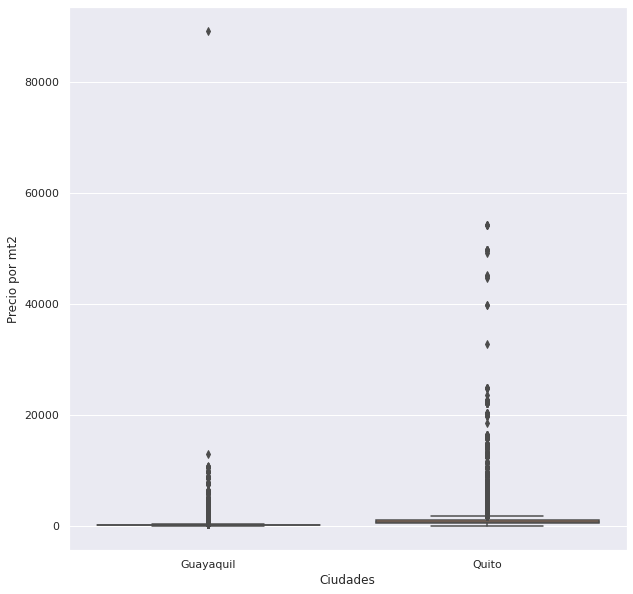

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = sns.boxplot(data=df_venta, y='precioxmt2', x='l3', ax=ax)
_ = ax.set_xlabel('Ciudades')
_ = ax.set_ylabel('Precio por mt2')

In [ ]:
pxmt2_q = df_venta.groupby('Nombre_sector').agg({'precioxmt2': [q1, q3]})

In [ ]:
pxmt2_q.columns = ['q1', 'q3']
pxmt2_q

,q1,q3
Nombre_sector,,
Abel Gilbert,31.681206,64.514455
Acacias,25.056954,69.410641
Academia Logos,62.642384,109.444165
Acuarela,43.849669,87.123315
Alborada,40.321534,91.587485
...,...,...
Villas del Bosque,72.002740,83.523178
Villas del Rey,32.257228,39.745512
Vista Sol,103.251929,272.170357


In [ ]:
def notOutlier(x):
  v = x['precioxmt2']
  sector = x['Nombre_sector']
  q1 = pxmt2_q.loc[sector, 'q1']
  q3 = pxmt2_q.loc[sector, 'q3']
  iqr = q3-q1
  op = (v >= q1-1.5*iqr) and (v <= q3+1.5*iqr)
  return op

In [ ]:
idx_pxmt2 = df_venta.apply(notOutlier, axis=1)

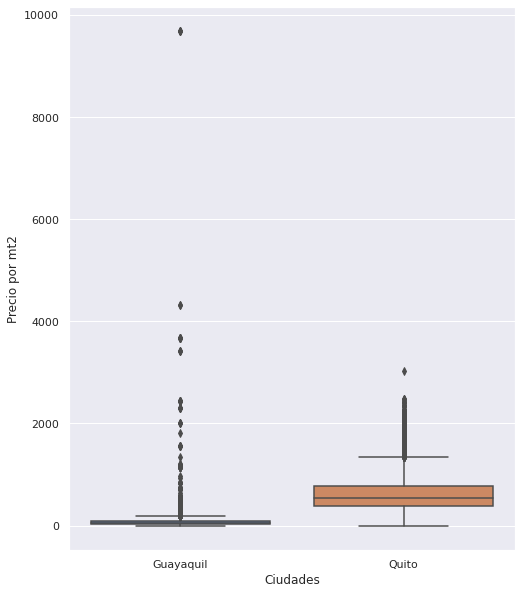

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
_ = sns.boxplot(data=df_venta[idx_pxmt2], y='precioxmt2', x='l3', ax=ax)
_ = ax.set_xlabel('Ciudades')
_ = ax.set_ylabel('Precio por mt2')

In [ ]:
idx_pxmt2.sum()

35116

### precios de alquiler

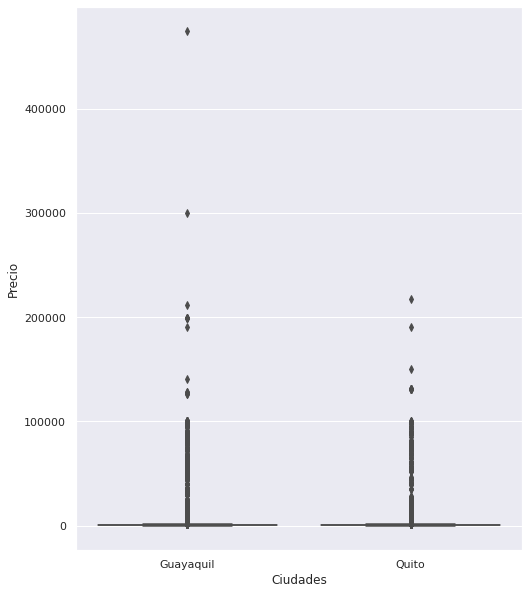

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
_ = sns.boxplot(data=df_alquiler, y='price', x='l3', ax=ax)
_ = ax.set_xlabel('Ciudades')
_ = ax.set_ylabel('Precio')

In [ ]:
palq_q = df_alquiler.groupby('Nombre_sector').agg({'price': [q1, q3]})

In [ ]:
palq_q.columns = ['q1', 'q3']
palq_q

,q1,q3
Nombre_sector,,
Abel Gilbert,3000.0,3000.0
Acacias,245.0,300.0
Academia Logos,500.0,850.0
Acuarela,310.0,450.0
Alborada,300.0,572.5
...,...,...
Villas del Bosque,650.0,850.0
Villas del Rey,300.0,365.0
Vista Sol,500.0,1225.0


In [ ]:
def notOutlier(x):
  price = x['price']
  sector = x['Nombre_sector']
  q1 = palq_q.loc[sector, 'q1']
  q3 = palq_q.loc[sector, 'q3']
  iqr = q3-q1
  op = (price >= q1-1.5*iqr) and (price <= q3+1.5*iqr)
  return op

In [ ]:
idx_alquiler = df_alquiler.apply(notOutlier, axis=1)

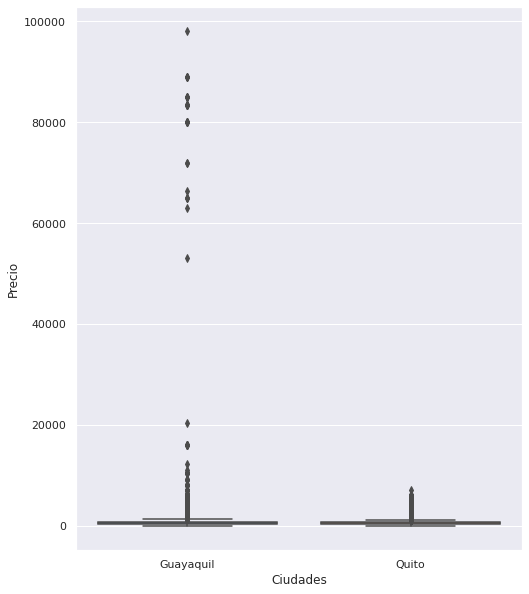

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
_ = sns.boxplot(data=df_alquiler[idx_alquiler], y='price', x='l3', ax=ax)
_ = ax.set_xlabel('Ciudades')
_ = ax.set_ylabel('Precio')

In [ ]:
idx_alquiler.sum()

35273

### áreas de propiedades en alquiler

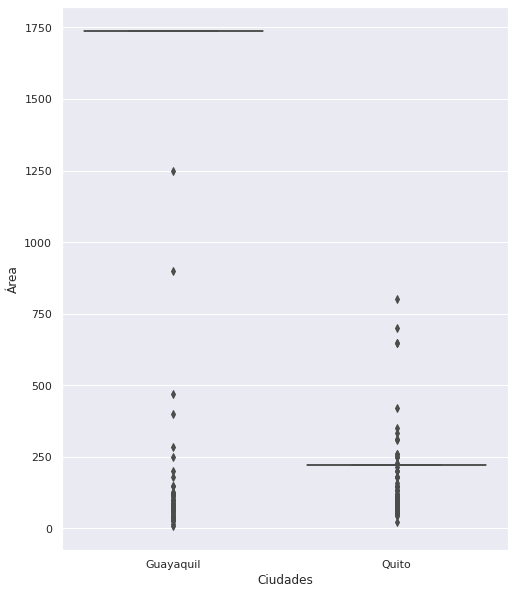

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
_ = sns.boxplot(data=df_alquiler, y='surface_total', x='l3', ax=ax)
_ = ax.set_xlabel('Ciudades')
_ = ax.set_ylabel('Área')

In [ ]:
area_q = df_alquiler.groupby('l3').agg({'surface_total': [q1, q3]})
area_q.columns = ['q1', 'q3']

In [ ]:
area_q

,q1,q3
l3,,
Guayaquil,1736.045045,1736.045045
Quito,221.638298,221.638298


In [ ]:
def notOutlier(x):
  v = x['surface_total']
  sector = x['l3']
  q1 = area_q.loc[sector, 'q1']
  q3 = area_q.loc[sector, 'q3']
  iqr = q3-q1
  op = (v >= q1-1.5*iqr) and (v <= q3+1.5*iqr)
  return op

In [ ]:
idx_area = df_alquiler.apply(notOutlier, axis=1)

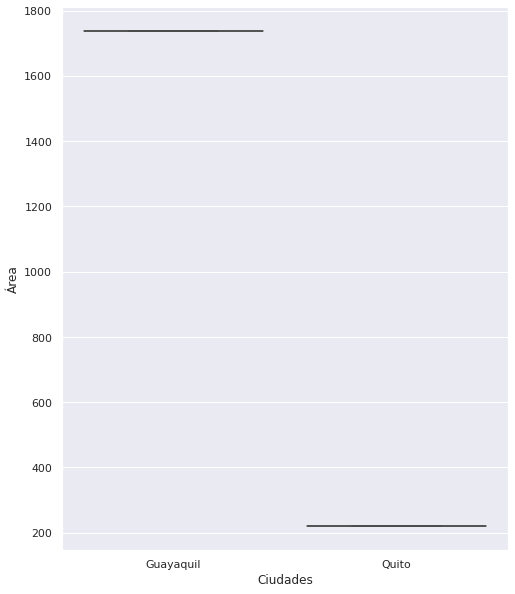

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
_ = sns.boxplot(data=df_alquiler[idx_area], y='surface_total', x='l3', ax=ax)
_ = ax.set_xlabel('Ciudades')
_ = ax.set_ylabel('Área')

In [ ]:
idx_area.sum()

39126

### resultados de análisis de outliers

In [ ]:
df_alquiler = df_alquiler[(idx_area & idx_alquiler)]

In [ ]:
df_venta = df_venta[idx_pxmt2]

In [ ]:
FILAS_P5 = df_alquiler.shape[0] + df_venta.shape[0]

In [ ]:
FILAS_P4

78085

In [ ]:
FILAS_P5

70243

In [ ]:
print(f'Se eliminaron {FILAS_P4 - FILAS_P5} filas con el análisis de outliers\n{(~idx_alquiler).sum() + (~idx_area).sum()} propiedades de alquiler y {(~idx_pxmt2).sum()} propiedades en venta')

Se eliminaron 7842 filas con el análisis de outliers
4165 propiedades de alquiler y 3687 propiedades en venta


## análisis de ruido

In [ ]:
FILAS_INICIALES = 288984

In [ ]:
ruido = (FILAS_INICIALES-FILAS_P5)
ruido

218741

In [ ]:
100*ruido/FILAS_INICIALES

75.69311795808764

El 75.7% de los datos se descartaron

## exportación de datasets

In [ ]:
hv_output = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/output'

In [ ]:
alquiler_fn = 'propiedades_en_alquiler.csv'
ventas_fn = 'propiedades_en_venta.csv'

In [ ]:
df_venta.to_csv(f'{hv_output}/{ventas_fn}',index=False)

In [ ]:
df_alquiler.to_csv(f'{hv_output}/{alquiler_fn}',index=False)